In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir('/content/drive/MyDrive/Chess')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Load the chess data from a CSV file 
train_file = pd.read_csv("train5.csv")

**Pre-processing**
1. Drop the Draw 
2. Replace the result cases to win, draw, lose from the number 



In [ ]:
# preprocessing the results 
train_file["result"].replace({1: "win", 0.5: "draw", 0: "lose"}, inplace=True)

print(train_file.shape) #(119802, 14)

# Drop the Draw cases 
train_file = train_file[train_file["result"] != "draw"]
print(train_file.shape) # (99414, 14)

train_file.to_csv("modified_chess_data.csv", index=False)
chess_data = pd.read_csv("modified_chess_data.csv")

# chess_data = chess_data.astype('float32')


(119802, 14)
(99414, 14)


In [ ]:
chess_data.head()

whiteElo  blackElo  numLegalMoves  numQueens  numPawns  bishPair  \
0      2869      2820             42          2        14         6   
1      2869      2834             46          2        14         6   
2      2874      2831             58          2        12         6   
3      2866      2860             39          2        12         3   
4      2867      2859             38          0        14         1   

   knightPair  rookPair  whitePtV  blackPtV  ptVDiff  whiteCR  blackCR result  
0           3         6        35        35        0        0        0    win  
1           3         6        35        35        0        0        0   lose  
2           6         6        37        37        0        0        0    win  
3           5         6        31        34       -3        0        1    win  
4           5         6        23        23        0        0        0    win

**LOGISTIC REGRESSION**

In [ ]:
X = chess_data[["whiteElo", "blackElo","numLegalMoves", "numQueens", "numPawns", "bishPair", "knightPair", "rookPair", "whitePtV", "blackPtV", "ptVDiff", "whiteCR", "blackCR" ]]
y = chess_data["result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit a logistic regression model
clf = LogisticRegression(max_iter=7600, random_state=42)
clf.fit(X_train, y_train)

# Calculate accuracy on the test set
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)




Accuracy: 0.5553487904239803


Accuracy : 46%

After the preprocessing : 55%

The default iteration is 1000, to change the max_iter to 7600 showed little increase around 1%

**Hyperparameter tuning**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define the hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}

model = LogisticRegression(max_iter=7600)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Random Forests

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

(119802, 14)
(99414, 12)


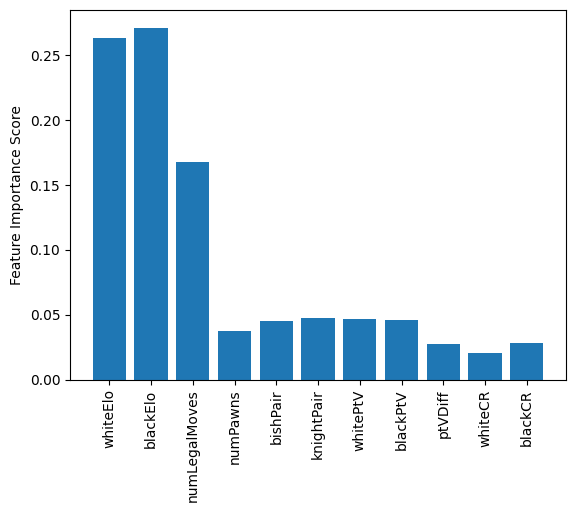

In [ ]:
# Load and prepare the dataset
# Load the chess data from a CSV file 
# train_file =train_df

# preprocessing the results 
train_file["result"].replace({1: "win", 0.5: "draw", 0: "lose"}, inplace=True)

print(train_file.shape) #(119802, 14)
train_file = train_file.drop( ["numQueens","rookPair"]
, axis=1)
# Drop the Draw cases 
train_file = train_file[train_file["result"] != "draw"]
print(train_file.shape) # (99414, 14)

train_file.to_csv("modified_chess_data.csv", index=False)
chess_data = pd.read_csv("modified_chess_data.csv")

X = chess_data.drop('result', axis=1)
y = chess_data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rfc.feature_importances_

# Visualize feature importance scores
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance Score')
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Extract the features and target variable from the data
X = chess_data[["whiteElo", "blackElo","numLegalMoves", "numQueens", "numPawns", "bishPair", "knightPair", "rookPair", "whitePtV", "blackPtV", "ptVDiff", "whiteCR", "blackCR" ]]
y = chess_data["result"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5076195745108887


Accuracy: 43%

After pre-processing: 50% 

**Hyertune the Decision Tree**

# Neural Network

In [ ]:

df  = pd.read_csv("train5.csv")

X = df[["whiteElo", "blackElo","numLegalMoves", "numQueens", "numPawns", "bishPair", "knightPair", "rookPair", "whitePtV", "blackPtV", "ptVDiff", "whiteCR", "blackCR" ]]
y = df["result"]

print(df.shape) #(119802, 14)

# Drop the Draw cases 
df = df[df["result"] != 0.5]
print(df.shape) # (99414, 14)


(119802, 14)
(99414, 14)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchtext.vocab import Vocab
from torchtext.data.utils import get_tokenizer
from collections import Counter
from sklearn.model_selection import train_test_split


num_features = 13
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

device = torch.device("cuda:0")

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32).cuda()
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1).cuda()
X_test = torch.tensor(X_test.values, dtype=torch.float32).cuda()
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1).cuda()

X_train = X_train.reshape(-1, num_features, 1, 1)
X_test = X_test.reshape(-1, num_features, 1, 1)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle = False)


In [ ]:
# Define the CNN architecture
class ChessCNN(nn.Module):
    def __init__(self):
        super(ChessCNN, self).__init__()
        
        # Define the layers of the CNN
        self.conv1 = nn.Conv2d(in_channels=13, out_channels=8, kernel_size=3, stride=1, padding=1)
        # self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(in_features=128, out_features=1)
        
        # Define the activation function
        self.relu = nn.ReLU()
        
    def forward(self, x):
        #print(x.shape)

        # Apply the layers of the CNN
        x = self.conv1(x)
        #print(x.shape)
        x = self.relu(x)
        #print(x.shape)
        x = self.conv2(x)
        #print(x.shape)
        x = self.relu(x)
        #print(x.shape)
        x = self.conv3(x)
        #print(x.shape)
        x = self.relu(x)
        x = self.conv4(x)
        #print(x.shape)
        x = self.relu(x)
        x = self.conv5(x)
        #print(x.shape)
        x = self.relu(x)
        x = self.conv6(x)
        #print(x.shape)
        x = self.relu(x)
        #print("before flatten:",x.shape)
        
        # Flatten the output for the fully connected layer
        x = x.view(-1, 128)
        #print("after flatten",x.shape)
        # Apply the fully connected layer
        x = self.fc1(x)

        return x

In [ ]:
# Initialize the CNN model
model = ChessCNN()

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the CNN model
num_epochs = 10

train_losses = []
train_accs = []

for epoch in range(num_epochs):

    print("Epoch",epoch)
    running_loss = 0.0
    running_corrects = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        # Move the data and target to the device
        data = data.to(device)
        target = target.to(device)

        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, target)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss and accuracy
        running_loss += loss.item() * data.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == target.data)

    # Calculate epoch loss and accuracy
    epoch_loss = running_loss / len(train_loader.dataset)
    #epoch_acc = running_corrects.double() / len(train_loader.dataset)
    epoch_acc = 100 * running_corrects.double() / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)
    print("Train Loss: {:.4f} Train Acc: {:.4f}%".format(epoch_loss, epoch_acc))


# Test
model.eval()

total_correct = 0
total_loss = 0
# Disable gradient computation to speed up inference
with torch.no_grad():
    for inputs, labels in test_loader:
        # Move the inputs and labels to the device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Compute the number of correct predictions
        _, predicted = torch.max(outputs.data, 1)
        total_correct += (predicted == labels).sum().item()
        
        # Update the total loss
        total_loss += loss.item() * inputs.size(0)

# Compute the overall accuracy and loss
accuracy = total_correct / len(test_loader.dataset)
loss = total_loss / len(test_loader.dataset)
print('Test Accuracy: {:.2f}%, Test Loss: {:.4f}'.format(accuracy * 100, loss))


# LSTM



https://www.kaggle.com/code/gcdatkin/chess-win-prediction-with-rnns

In [ ]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
# Add the header
import csv

header = ["whiteElo","blackElo","numLegalMoves","numQueens","numPawns","bishPair","knightPair","rookPair","whitePtV","blackPtV","ptVDiff","whiteCR","blackCR","result","eval"]

with open('train.csv', mode='r+') as file:
    # Create a reader object
    reader = csv.reader(file)

    # Read the existing data and skip the header row if it exists
    data = [row for row in reader if row]

    # Go back to the beginning of the file
    file.seek(0)

    # Create a writer object with the same delimiter as the reader
    writer = csv.writer(file, delimiter=reader.dialect.delimiter)

    # Write the header row
    writer.writerow(header)

    # Write the existing data back to the file
    writer.writerows(data)

In [ ]:
import csv

# Open the input CSV file and read its contents
with open('train.csv', 'r') as input_file:
    csv_reader = csv.reader(input_file)
    rows = list(csv_reader)

# Define the indices of columns A and B
index_a = 13  # the index of column A
index_b = 14  # the index of column B

# Swap the values in columns A and B for each row in the list
for row in rows:
    row[index_a], row[index_b] = row[index_b], row[index_a]

# Write the updated data to a new CSV file
with open('output.csv', 'w', newline='') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerows(rows)

In [ ]:
train_df = pd.read_csv("output.csv")
# train_df = train_df.drop(['result'], axis=1)

#Convert to float
train_df['eval'] = pd.to_numeric(train_df['eval'], errors='coerce')
train_array = train_df['eval'].values.astype(np.float32)
train_tensor = tf.constant(train_array)


train_df['result'] = pd.to_numeric(train_df['result'], errors='coerce')
train_array = train_df['result'].values.astype(np.float32)
train_tensor = tf.constant(train_array)

# test_df['eval'] = pd.to_numeric(test_df['eval'], errors='coerce')
train_df = train_df.dropna(axis=0, subset=['eval'])

train_df.head()

whiteElo blackElo numLegalMoves numQueens numPawns bishPair knightPair  \
11     2431     2400            43         2       13        4          4   
12     2442     2411            24         0       12        1          7   
13     2412     2441            49         2       14        2          7   
14     2425     2443            30         0       13        3          1   
15     2454     2415            41         2       12        4          4   

   rookPair whitePtV blackPtV ptVDiff whiteCR blackCR   eval  result  
11        3       31       32      -1       2       2 -232.0     0.0  
12        3       25       25       0       2       2   -5.0     0.5  
13        3       32       32       0       1       2  168.0     1.0  
14        3       26       28      -2       2       2    6.0     0.0  
15        3       31       31       0       2       2 -151.0     0.0

In [ ]:
# Drop the draw cases 

train_df = train_df[train_df["result"] != 0.5]
print(train_df.shape) # (99414, 14)

(53197, 15)


Split the Dataset 

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_set, test_set = train_test_split(train_df, test_size=0.2, random_state=42)

# Save the training and testing sets as CSV files
train_set.to_csv('train_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

In [ ]:
df = train_set.astype('float32')
df = df.drop( ["numQueens","rookPair"]
, axis=1)


In [ ]:
dtypes = df.dtypes

print(dtypes)


whiteElo         float32
blackElo         float32
numLegalMoves    float32
numPawns         float32
bishPair         float32
knightPair       float32
whitePtV         float32
blackPtV         float32
ptVDiff          float32
whiteCR          float32
blackCR          float32
eval             float32
result           float32
dtype: object


In [ ]:
# dataset = pd.read_csv('train_set.csv')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
data = df.values
X = data[:, :-1]
y = data[:, -1]

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Reshape the input features to a 3D array
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset into training and testing sets
split = int(0.8 * len(data))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Define the RNN model
# model = Sequential()
# model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))

# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam')

# Define the RNN model
n_units = 50
n_classes = 1
model = Sequential()
model.add(LSTM(n_units, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(n_units))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='sigmoid'))

# Compile the model
learning_rate = 0.001
optimizer = RMSprop(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
batch_size = 64
n_epochs = 100
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Train the RNN model
# history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=2)

In [ ]:
# Get the model predictions for the test set
y_pred = model.predict(X_test)

# Convert the probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the accuracy
accuracy = (y_pred_binary == y_test.reshape(-1, 1)).mean()
print('Accuracy:', accuracy)

266/266 [==============================] - 0s 2ms/step
Accuracy: 0.6100798872180451


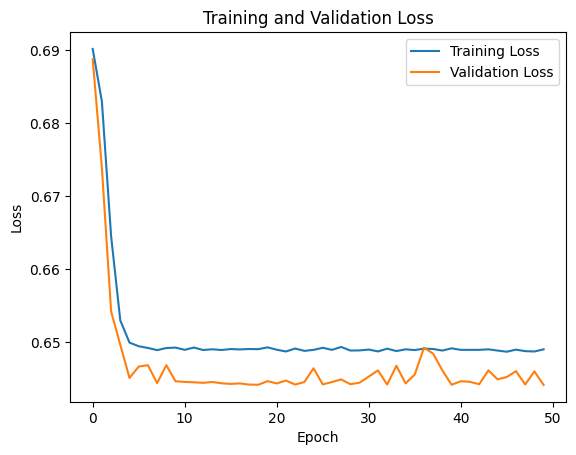

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()